# Week 1

### Context
#### Exploratory Data Analysis
- Feature Distribution Visulization
- Feature Statistics & Outlier
- Missing Values

#### Data Preprocessing
- Data Scaling
    - Min-Max Scaling
    - Standard Scaling
    - Log Transformation
    - Box-Cox, Yeo-Johnson, Quantile Transformation


- Missing Value Imputation 
    - Mean, Median, Mode
    - Iterative Imputation(MICE)


- Categorical Variable to Numeric Variable
    - Label Encoding
    - One-hot Encoding


- Dimensionality Reduction
    - Principal Component Analysis

In [1]:
from os.path import join

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
BASE_DIR = '../'

In [3]:
train_path = join(BASE_DIR, 'data', 'MDC14', 'train.csv')
test_path  = join(BASE_DIR, 'data', 'MDC14', 'test.csv')

data = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [4]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [5]:
data.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [7]:
# 불필요한 컬럼 제거
data.drop(columns=['index', 'credit'], inplace=True)
test.drop(columns=['index'],           inplace=True)

In [8]:
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t == 'O'] 
num_columns = [c for c    in data.columns if c not in cat_columns]

print('Categorical Columns: \n{}\n'.format(cat_columns))
print('Numeric Columns: \n{}'.format(num_columns))

Categorical Columns: 
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']

Numeric Columns: 
['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'begin_month']


In [9]:
data.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
dtypes: flo

# Data Scaling
## 스케일링을 왜 해야할까요?
변수의 크기가 너무 작거나, 너무 큰 경우 해당 변수가 Target 에 미치는 영향력이 제대로 표현되지 않을 수 있습니다.<br>
Scikit-Learn의 대표적인 스케일링 함수로는 특정 변수의 최대, 최소 값으로 조절하는 Min-Max 스케일링과 z-정규화를 이용한 Standard 스케일링이 있습니다.

- 주의!! 스케일링은 변수의 분포를 변경하지 않습니다. 

### 1. Min-Max Scaling
- Min-Max 스케일링을 하면, 값의 범위가 0 ~ 1 사이로 변경됩니다. <br> 
수식을 직관적으로 이해해보면, X에 존재하는 어떤 가장 작은 값 x <sub>m</sub>에 대해서 x <sub>m</sub>는 Min(X)의 값과 같습니다. <br>
따라서 스케일링 후 x<sub>m</sub>은 0이되고, X에 존재하는 어떤 가장 큰 값x <sub>M</sub>은 분모의 식과 같아지므로 1이됩니다.

$$ x - Min(X) \over Max(X) - Min(X) $$<br>
$$X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$ 

Scikit-Learn에서 Min-Max Scaler는 preprocessing 패키지에 있습니다.

#### ref
- [Scikit-learn Min-Max Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmax#sklearn.preprocessing.MinMaxScaler)

In [11]:
numeric_data = data[num_columns].values

In [12]:
numeric_data.shape

(26457, 10)

In [13]:
np.min(numeric_data, axis=0).shape

(10,)

In [15]:
np.max(numeric_data, axis=0).shape

(10,)

In [ ]:
(numeric_data - np.min(numeric_data, axis=0)) / (np.max(numeric_data, axis=0) - np.min(numeric_data, axis=0) + 1e-10)

#### 1) 모델 불러오기 및 정의하기

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#### 2) 데이터에서 특징 찾기(Min, Max 값)

In [ ]:
scaler.fit(numeric_data)

#### 3) 데이터 변환

In [ ]:
scaled_data = scaler.transform(numeric_data)
scaled_data = pd.DataFrame(scaled_data, columns=num_columns)

#### 4) 결과 살펴보기

In [ ]:
data[num_columns].head()

In [ ]:
data[num_columns].describe()

In [ ]:
scaled_data.head()

In [ ]:
scaled_data.describe()

## 2. Standard Scaling
데이터를 통계적으로 표준정규분포화 시켜 스케일링을 하는 방식입니다. `z-score 정규화` 라고도 합니다.<br>
데이터의 평균이 0, 표준 편차가 1이 되도록 스케일링 합니다.

$$ z = {{x - \mu} \over {\sigma}} $$
$$ \mu : 데이터의\ 평균, mean(X) $$
$$ \sigma : 데이터의\ 표준편차, std(X)$$
$$ X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$
Scikit-Learn에서 Standard Scaler는 preprocessing 패키지에 있습니다.

#### ref
- [Scikit-learn, Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [ ]:
(numeric_data - np.mean(numeric_data, axis=0)) / (np.std(numeric_data, axis=0) + 1e-10)

#### 1) 모델 불러오기 및 정의하기

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#### 2) 데이터에서 특징 찾기(Mean, Std 값)

In [ ]:
scaler.fit(numeric_data)

#### 3) 데이터 변환

In [ ]:
scaled_data = scaler.transform(numeric_data)
scaled_data = pd.DataFrame(scaled_data, columns=num_columns)

#### 4) 결과 살펴보기

In [ ]:
data[num_columns].head()

In [ ]:
data[num_columns].describe()

In [ ]:
scaled_data.head()

In [ ]:
1e-3

In [ ]:
scaled_data.describe()

## 3. Log Transformation
변수의 범위를 조정하는 Min-Max Scaling과 Standard Scaling을 확인했습니다.<br>
이번에는 치우친 분포(skew)의 형태를 보정해주는 방법 중 하나인 Log Transformation에 대해 배우겠습니다.<br>
로그 변환은 어떤 변수의 범위가 양수인 경우 사용할 수 있으며, 각 변수에 대해 자연 로그를 취하는 연산 입니다.<br>
해당 연산을 적용하면, 다음과 같은 왼쪽으로 치우친 분포(왼쪽)를 좋은 형태(오른쪽)의 정규 분포의 형태로 만들어줄 수 있습니다.<br>
이는 왼쪽 그림에서 오른쪽으로 치우친 큰 값들을 작게(지수로) 표현함으로써 분포를 왼쪽으로 당기는 효과를 줄 수 있기 때문입니다.

<img src='https://miro.medium.com/max/1620/1*O2R4nH0nR6d3bOxaYU10lg.png'>

#### ref
- [Log Transformation](https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9)

In [ ]:
# 로그 변환 전
scaled_data['income_total'].hist(bins=20)

In [ ]:
# 로그 변환 후
scaled_data['log_income_total'] = np.log(data['income_total'])
scaled_data['log_income_total'].hist(bins=20)

## 4. Box-Cox, Yeo-Johnson, Quantile Transformation
또 다른 여러가지 변환이 있습니다. 세가지 변환 모두 치우친 분포의 데이터를 정규 분포로 보정해주는 효과가 있으며,<br>
Box-Cox 변환의 경우 Log 변환과 함께 양수에만 적용할 수 있는 변환이고, Yeo-Johnsong 변환은 Box-Cox 변환의 제약인 음수를 가진 변수에서도 변환을 할 수 있는 변환입니다.<br>
Quantile 변환은 가장 자주 발생하는 값(the most frequent values.) 주위로 분포를 조정하며, 이상치의 영향을 감소시켜주는 특징도 있습니다.

- Box-Cox 변환은 Lambda 값에 따라 변환이 달라지게 되는데, Lambda 값이 0일 경우 Log 변환과 동일합니다.

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_map_data_to_normal_001.png'>

#### ref
- [Scikit-learn PowerTransformer, Box-Cox, Yeo-Johnson Transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer)
- [Scikit-learn Quantile Transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer)
- [Scikit-learn Map Data To Normal Dist](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py)

In [ ]:
# 변환 전
scaled_data['income_total'].hist(bins=20)

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Box-Cox 변환 후
trans = PowerTransformer(method='box-cox')

scaled_data['box_cox_income_total'] = trans.fit_transform(data['income_total'].values.reshape(-1, 1))
scaled_data['box_cox_income_total'].hist(bins=20)

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Yeo-Johnson 변환 후
trans = PowerTransformer(method='yeo-johnson')

scaled_data['yeo_johnson_income_total'] = trans.fit_transform(scaled_data['income_total'].values.reshape(-1, 1))
scaled_data['yeo_johnson_income_total'].hist(bins=20)

In [ ]:
from sklearn.preprocessing import QuantileTransformer

# Quantile 변환 후
trans = QuantileTransformer(output_distribution='normal')

scaled_data['quantile_income_total'] = trans.fit_transform(scaled_data['income_total'].values.reshape(-1, 1))
scaled_data['quantile_income_total'].hist(bins=20)

# Imputation
## 대표 값을 사용한 결측치 처리
정형 데이터를 다루다보면, 값이 NaN(Not a Number or Null)으로 되어있는 경우가 있습니다. 이러한 값을 결측치라 하며, <br>
가장 간단한 방법으로 평균이나 중간값 또는 최빈값 같은 변수의 대표값을 사용할 수 있습니다. <br>

결측치를 확인하는 방법으로 missingno 라이브러리의 `matrix()` 메소드를 사용하거나 Pandas의 `isna() + sum()` 메소드를 사용할 수 있습니다.

In [16]:
data.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0


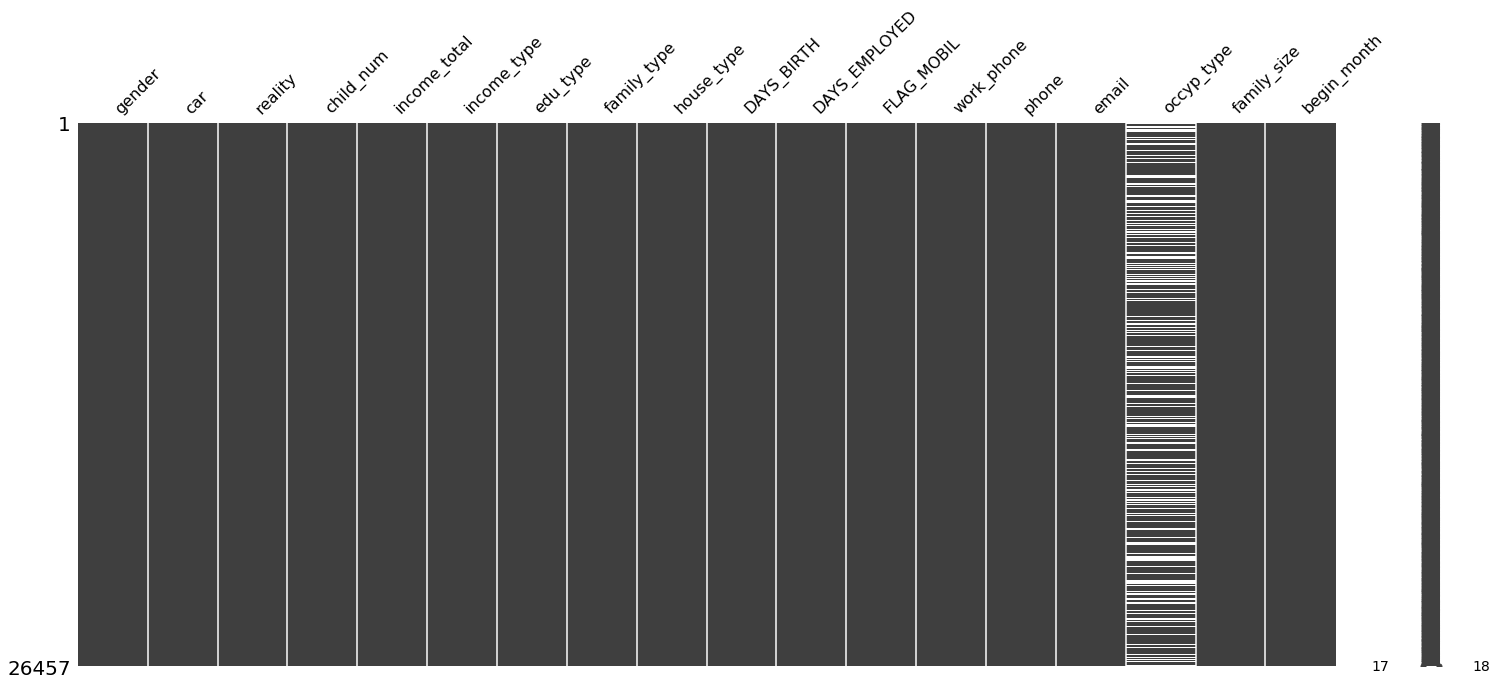

In [17]:
import missingno as msno

msno.matrix(data)

In [ ]:
pd.isna?

In [22]:
pd.isna(data).sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
dtype: int64

수치형 변수에 결측치가 존재하지 않으므로 임의로 인덱스를 선택해 결측치를 만들겠습니다.

In [ ]:
missing_idx = np.random.choice(data.index.values, size=data.shape[0]//10, replace=False)

In [ ]:
data.shape, missing_idx.shape

In [ ]:
missed_data = data.copy()
missed_data.iloc[missing_idx] = np.nan 

In [ ]:
pd.isna(missed_data).sum()

### 1. Mean(평균)

확률 이론과 통계 관점에서 (모)평균 또는 기댓값은 중심에 대한 경향성을 알 수 있는 척도입니다.<br>
일반적으로 평균이라고 부르는 것으로 산술 평균이라고 하고, 이 평균은 표본 평균이라고도 합니다.<br>
평균은 모든 관측치의 값을 모두 반영하므로 `지나치게 작거나 큰 값(이상치)들의 영향을 많이` 받게 됩니다.<br>
평균은 모든 샘플의 값을 더하고, 샘플의 개수로 나누어 계산할 수 있습니다.<br>

$$ E(x) = {\sum x \over n}$$

평균, 중간값, 최빈값으로 결측치를 처리하는 SimpleImputer는 Scikit-Learn에서 impute 패키지에 있습니다.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
mean_df = missed_data.copy()

In [ ]:
pd.isna(mean_df[num_columns]).sum()

In [ ]:
imputer = SimpleImputer(strategy='mean')
mean_df[num_columns] = imputer.fit_transform(mean_df[num_columns])

In [ ]:
pd.isna(mean_df[num_columns]).sum()

In [ ]:
mean_df.head(20)

### 2. Median(중간값) 
중간값은 데이터 샘플을 개수에 대해서 절반으로 나누는 위치의 값을 말합니다. <br>
데이터 샘플의 수가 짝수개일 때에는 중간에 위치한 두 값의 평균을 사용합니다.<br>
중간값은 모든 관측치의 값을 모두 반영하지 않으므로 `지나치게 작거나 큰 값(이상치)들의 영향을 덜` 받습니다.<br>
중간값은 샘플을 값에 대해 정렬하고, 중앙에 위치한 값으로 구할 수 있습니다.

In [ ]:
median_df = missed_data.copy()

In [ ]:
pd.isna(median_df[num_columns]).sum()

In [ ]:
median_df[num_columns].median()

In [ ]:
imputer = SimpleImputer(strategy='median')
median_df[num_columns] = imputer.fit_transform(median_df[num_columns])

In [ ]:
pd.isna(median_df[num_columns]).sum()

In [ ]:
median_df.head(20)

### 3. Iterative Impute (R 언어의 MICE 패키지)
Round robin 방식으로 반복하여 결측값을 회귀하는 방식으로 결측치를 처리합니다. <br>
결측값을 회귀하는 방식으로 처리하기 때문에 수치형 변수에만 적용할 수 있습니다.

1. 각 결측치를 해당 변수의 평균으로 채워넣는다. 
2. 대체할 변수의 결측치는 제외한 상태로 해당 변수의 결측치를 회귀모델을 이용하여 예측한다.
3. 다른 변수에서도 해당 방식을 반복한다.
4. 모든 변수에 대해 반복 후 해당 이터레이션에서 맨 처음에 할당했던 값과의 차이를 계산한다.
5. 해당 값의 차이가 0이 될 때(수렴)까지 반복한다.

MICE 알고리즘으로 결측치를 처리하는 IterativeImputer는 Scikit-Learn에서 impute 패키지에 있습니다.

#### ref
- [Scikit-Learn, Iterative Imputer (MICE)](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html?highlight=mice)
- [MICE 알고리즘 설명](https://ichi.pro/ko/deiteo-seteueseo-gyeol-cheuggabs-eul-daechihaneun-mice-algolijeum-217004654686142)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
impute_df = missed_data.copy()

In [ ]:
pd.isna(impute_df[num_columns]).sum()

In [ ]:
imp_mean = IterativeImputer(random_state=0)
impute_df[num_columns] = imp_mean.fit_transform(impute_df[num_columns])

In [ ]:
pd.isna(impute_df[num_columns]).sum()

### 4. Mode(최빈값)
최빈값은 범주형 변수에서 가장 자주 등장하는 값을 말합니다.<br>

In [ ]:
mode_df = missed_data.copy()

In [ ]:
pd.isna(mode_df[cat_columns]).sum()

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
mode_df[cat_columns] = imputer.fit_transform(mode_df[cat_columns])

In [ ]:
pd.isna(mode_df[cat_columns]).sum()

In [ ]:
imputer.statistics_

### 주의사항
- 결측치 처리는 가능하면 스케일링 작업 이전에 해주는 것이 좋습니다. 예를 들어 특정 컬럼의 결측치를 평균 값으로 대치하려고할 때 Standard Scaling을 진행하게되면 해당 컬럼의 결측치는 모두 0으로 대치될 수 있기 때문입니다. 

# Categorical Variable to Numeric Variable 
이번에는 범주형 변수를 수치형 변수로 나타내는 방법에 대해 알아보겠습니다. <br>
여기에서 범주형 변수란, 차의 등급을 나타내는 [소형, 중형, 대형] 처럼 표현되는 변수를 말합니다. <br>
범주형 변수는 주로 데이터 상에서 문자열로 표현되는 경우가 많으며, 문자와 숫자가 매핑되는 형태로 표현되기도 합니다.<br>

## 1. Label Encoding
라벨 인코딩은 n개의 범주형 데이터를 0~n-1 의 연속적인 수치 데이터로 표현합니다.<br>
예를 들어, 차의 등급 변수를 라벨 인코딩으로 변환하면 다음과 같이 표현할 수 있습니다.<br>
소형 : 0 <br>
중형 : 1 <br>
대형 : 2 <br>
라벨 인코딩은 간단한 방법이지만, '소형'과 '중형'이라는 범주형 데이터가 가지고 있는 차이가 0과 1의 수치적인 차이라는 의미가 아님을 주의하셔야 합니다. 

Label Encoding과 Scikit-Learn의 preprocessing 패키지에 있습니다.

#### ref
- [Scikit-Learn Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=label%20encoder#sklearn.preprocessing.LabelEncoder)

#### 1) 모델 불러오기 및 정의하기

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### 2) 데이터에서 특징 찾기 (범주의 수)

In [ ]:
le.fit(data['family_type'])

In [ ]:
# classes_ 속성에 있는 순서(index)대로 라벨 번호가 부여됩니다.
le.classes_

#### 3) 데이터 변환 (범주형 변수를 수치형 변수로)

In [ ]:
label_encoded = le.transform(data['family_type'])

#### 4) 결과 살펴보기

In [ ]:
result = pd.DataFrame(data = np.concatenate([data['family_type'].values.reshape((-1,1)), label_encoded.reshape((-1, 1))], axis=1), 
                      columns=['label', 'label_encoded'])
result.head(20)

## 2. One-hot Encoding
원핫 인코딩은 n개의 범주형 데이터를 n개의 비트(0,1) 벡터로 표현합니다. <br>
예를 들어, 위에서 언급한 소형, 중형, 대형으로 이루어진 범주형 변수를 원핫 인코딩을 통해 변환하면 다음과 같이 표현할 수 있습니다.<br>
소형 : [1, 0, 0] <br>
중형 : [0, 1, 0] <br>
대형 : [0, 0, 1] <br>
원핫 인코딩으로 범주형 데이터를 나타내게되면, 서로 다른 범주에 대해서는 벡터 내적을 취했을 때 내적 값이 0이 나오게 됩니다. <br> 
이는 서로 다른 범주 데이터는 독립적인 관계라는 것을 표현할 수 있게 됩니다.

One-hot Encoding은 Scikit-Learn의 preprocessing 패키지에 있습니다.

#### ref
- [Scikit-Learn One-Hot Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

#### 1) 모델 불러오기 및 정의하기

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

#### 2) 데이터에서 특징 찾기 (범주의 수)

In [ ]:
ohe.fit(data[['family_type']])

In [ ]:
ohe.categories_

#### 3) 데이터 변환 (범주형 변수를 수치형 변수로)

In [ ]:
one_hot_encoded = ohe.transform(data[['family_type']])

In [ ]:
one_hot_encoded

#### 4) 결과 살펴보기

In [ ]:
columns = np.concatenate([np.array(['family_type']) , ohe.categories_[0]])
result = pd.DataFrame(data = np.concatenate([data[['family_type']].values, one_hot_encoded.reshape((-1, ohe.categories_[0].shape[0]))], axis=1), 
                      columns=columns)
result.head(10)

# Dimensionality Reduction
## 차원 축소는 왜 해야할까요? - 차원의 저주
차원의 저주는 저차원에서는 일어나지 않는 현상들이 고차원에서 데이터를 분석하거나 다룰 때 생겨나는 현상을 말합니다.<br>
고차원으로 올라갈 수록 공간의 크기가 증가하게 되는데, 데이터는 해당 공간에 한정적으로 위치되어 빈 공간이 많아지기 때문에 발생합니다.<br>
이러한 이유로 데이터의 차원이 너무 큰 경우에는 필요없는 변수를 제거하고, 과적합을 방지하기위해 데이터의 차원을 축소합니다. <br>
또는, 사람이 인식할 수 있는 차원은 3차원이 최대이므로 데이터의 시각화를 위해 차원을 축소하기도 합니다.

<img src='https://aiaspirant.com/wp-content/uploads/2019/09/curse-of-dimensionality.png'>

## 주 성분 분석 (Principal Component Analysis, PCA)
대표적인 차원 축소 기법으로 주 성분 분석(이하, PCA)이라는 방법이 있습니다.<br>
PCA는 여러 차원으로 이루어진 데이터를 가장 잘 표현하는 축으로 Projection 해서 차원을 축소하는 방식을 사용합니다.<br>
데이터를 가장 잘 표현하는 축이란, 데이터의 분산을 잘 표현하는 축이라고 할 수 있습니다.<br>
기본적으로 주성분(Principal Component, PC)은 데이터 셋을 특이값 분해를 통해 추출된 고유 벡터입니다.<br>
각 고유 벡터들은 서로 직교성을 띄기 때문에 데이터를 주성분 벡터로 사영(Projection) 시키면 서로 독립적인 변수로 데이터를 표현할 수 있습니다.<br>
PCA의 단점으로는 떨어뜨린 주성분이 어떤 컬럼인지를 설명할 수 없다는 점이 있습니다. 

#### 주 성분 분석의 단계
1. 각 컬럼들의 값의 범위를 평균과 표준편차를 사용해 표준 정규화시켜 변수들의 분산을 동일하게 만들어줍니다.
2. 데이터의 공분산을 계산합니다.
3. 공분산 행렬에 대해 특이값 분해를 하여 주성분(고유 벡터)과 고유 값을 얻어냅니다.
4. 주성분과 대응되는 고유 값은 주성분이 데이터의 분산을 표현하는 정도의 척도로 사용되므로, 고유 값의 크기와 비율을 보고 몇개의 주성분을 선택할 것인지 또는 원하는 차원의 개수만큼의 주성분을 선택합니다.
5. 선택한 주성분으로 모든 데이터를 Projection시켜 데이터의 차원을 축소합니다.

#### Projection(사영)
Projection에 대해 간단히 짚고 넘어가겠습니다. <br>
벡터 공간에서 어떤 벡터 a와 b가 있을 때 벡터 b를 벡터 a에 사영한 결과(x)는 아래 그림과 같습니다.<br>
벡터 b를 벡터 a에 사영한다는 것은 벡터 a에 대해 수직인 방향으로 벡터 b를 떨어뜨리는 것을 의미합니다.<br>
간단히 말해서, 벡터 b의 그림자를 벡터 a에 떨어뜨린 것을 생각하시면 편합니다.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Projection_and_rejection.png/400px-Projection_and_rejection.png'>

PCA의 기본 원리는 변수의 분산을 가장 잘 표현하는 벡터(축)를 찾아 해당 벡터에 데이터들을 사영 시키는 것입니다.

PCA는 Scikit-Learn의 decomposition 패키지에 있습니다.

#### ref
- [Curse Of Dimensionality](https://aiaspirant.com/curse-of-dimensionality/)
- [Vector Projection](https://en.wikipedia.org/wiki/Vector_projection)
- [Scikit-Learn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA)

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()

이번에는 sklearn의 내장 데이터인, 64차원(8\*8) digit(숫자 이미지)데이터를 pca를 통해 2차원으로 떨어뜨려 시각화를 통해 살펴보겠습니다.

In [24]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [25]:
data = digits.data
label = digits.target

In [26]:
data.shape

(1797, 64)

숫자 이미지가 64 차원 벡터로 표현되어 있으므로 이미지를 확인하기 위해서는 (8,8) 행렬로 변환해주어야 합니다.

Label : 0


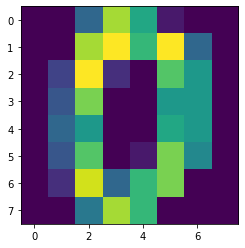

In [27]:
plt.imshow(data[0].reshape((8,8)))
print('Label : {}'.format(label[0]))

0번째 데이터는 이미지 상으로 0으로 보이고, 라벨도 0인 것을 확인하였습니다.<br>
pca를 통해 64차원 데이터를 2차원 데이터로 차원을 축소 시키겠습니다.<br>

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# Standard Scaler를 이용해 정규화 처리하면 각 변수들의 표준편차가 1이 됩니다. 분산은 표준편차의 제곱이므로 표준편차를 1로 동일하게 맞춰주면
# 모든 변수들의 분산이 1로 동일해집니다.

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

#### 1) 모델 불러오기 및 정의하기

In [31]:
from sklearn.decomposition import PCA
# n_components에 정수를 입력하면, 주 성분의 개수를 지정할 수 있고 실수를 입력하면 표현하는 분산의 비율로 주 성분의 개수를 결정할 수 있습니다.
pca = PCA(n_components=0.8) #0.8

#### 2) 데이터에서 특징 찾기 (주 성분 찾기)

In [32]:
pca.fit(scaled_data)

PCA(n_components=0.8)

In [33]:
pca.n_components_

21

In [38]:
pca.components_.shape

(21, 64)

In [40]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 ])

In [36]:
pca.singular_values_

array([114.85302699, 102.37451345,  96.21078044,  84.39999879,
        72.99010872,  67.96610756,  65.73578102,  60.95356994,
        57.32852629,  56.69191509,  55.22075421,  53.14969878,
        49.94115773,  49.41019748,  48.71816444,  45.80668083,
        44.1169066 ,  42.37454892,  41.83290264,  40.40305315,
        38.43961237])

#### 3) 데이터 변환 (주 성분으로 데이터 사영하기)

In [ ]:
new_data = pca.transform(scaled_data)

#### 4) 결과 살펴보기

In [ ]:
print('원본 데이터의 차원 \n{}'.format(data.shape))
print('\nPCA를 거친 데이터의 차원 \n{}'.format(new_data.shape))

In [ ]:
plt.scatter(new_data[:,0], new_data[:, 1], c=label, linewidth=1, edgecolor='black')
plt.show()